In [63]:
import pandas as pd
import skimpy
import numpy as np
import seaborn as sns

In [64]:
train = pd.read_csv('../Data/Raw/train.csv', parse_dates=['date'], dtype={'store_nbr': 'int', 'family': 'category', 'item_nbr': 'int', 'sales': 'float', 'onpromotion': 'int'})
transactions = pd.read_csv('../Data/Raw/transactions.csv')
stores = pd.read_csv('../Data/Raw/stores.csv')
oil = pd.read_csv('../Data/Raw/oil.csv')
holidays_events = pd.read_csv('../Data/Raw/holidays_events.csv', parse_dates=['date'], dtype={'type': 'category', 'locale': 'category', 'locale_name': 'category', 'description': 'category', 'transferred': 'int'})
test = pd.read_csv('../Data/Raw/test.csv', parse_dates=['date'], dtype={'store_nbr': 'int', 'family': 'category', 'item_nbr': 'int', 'onpromotion': 'int'})

In [65]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [66]:
skimpy.skim(train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types               Categories                                       │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                               │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                               │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                               │
│ │ Number of rows    │ 3000888 │ │ int64       │ 3     │ │ family                │                               │
│ │ Number of columns │ 6       │ │ datetime64  │ 1     │ └───────────────────────┘                               │
│ └───────────────────┴─────────┘ │ category    │ 1     │                                                         │
│                                 │ float64     │ 1     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0  ┃ p25     ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ id            │   0 │     0 │  1500000 │  866300 │   0 │  750200 │  1500000 │  2251000 │  3001000 │ ▇▇▇▇▇▇ │  │
│ │ store_nbr     │   0 │     0 │     27.5 │   15.59 │   1 │      14 │     27.5 │       41 │       54 │ ▇▇▇▇▇▇ │  │
│ │ sales         │   0 │     0 │    357.8 │    1102 │   0 │       0 │       11 │    195.8 │   124700 │   ▇    │  │
│ │ onpromotion   │   0 │     0 │    2.603 │   12.22 │   0 │       0 │        0 │        0 │      741 │   ▇    │  │
│ └───────────────┴─────┴───────┴──────────┴─────────┴─────┴─────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ family                           │         0 │              0 │ False                 │                 33 │  │
│ └──────────────────────────────────┴───────────┴────────────────┴───────────────────────┴────────────────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ date                   │      0 │         0 │     2013-01-01      │     2017-08-15      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [67]:
train = pd.get_dummies(train, columns=['family'], drop_first=True)
test = pd.get_dummies(test, columns=['family'], drop_first=True)

In [68]:
train.shape, transactions.shape, stores.shape, oil.shape, holidays_events.shape

((3000888, 37), (83488, 3), (54, 5), (1218, 2), (350, 6))

## Preprocess Holidays_events

In [69]:
holidays = (holidays_events\
            .query("transferred == False")\
            .query("locale == 'National'")\
            .loc[:,['description', 'date']]\
            .assign(description=lambda x: x.description.cat.remove_unused_categories())
           )

duplicated_dates = holidays.index.duplicated(keep='first')
holidays = holidays[~duplicated_dates]

holidays = pd.get_dummies(holidays, columns=['description'], prefix='holiday')

In [70]:
holidays.head()

,date,holiday_Batalla de Pichincha,holiday_Black Friday,holiday_Carnaval,holiday_Cyber Monday,holiday_Dia de Difuntos,holiday_Dia de la Madre,holiday_Dia de la Madre-1,holiday_Dia del Trabajo,holiday_Inauguracion Mundial de futbol Brasil,holiday_Independencia de Cuenca,holiday_Independencia de Guayaquil,holiday_Mundial de futbol Brasil: Cuartos de Final,holiday_Mundial de futbol Brasil: Ecuador-Francia,holiday_Mundial de futbol Brasil: Ecuador-Honduras,holiday_Mundial de futbol Brasil: Ecuador-Suiza,holiday_Mundial de futbol Brasil: Final,holiday_Mundial de futbol Brasil: Octavos de Final,holiday_Mundial de futbol Brasil: Semifinales,holiday_Mundial de futbol Brasil: Tercer y cuarto lugar,holiday_Navidad,holiday_Navidad+1,holiday_Navidad-1,holiday_Navidad-2,holiday_Navidad-3,holiday_Navidad-4,holiday_Primer Grito de Independencia,holiday_Primer dia del ano,holiday_Primer dia del ano-1,holiday_Puente Dia de Difuntos,holiday_Puente Navidad,holiday_Puente Primer dia del ano,holiday_Recupero Puente Dia de Difuntos,holiday_Recupero Puente Navidad,holiday_Recupero Puente Primer dia del ano,holiday_Recupero puente Navidad,holiday_Recupero puente primer dia del ano,holiday_Terremoto Manabi,holiday_Terremoto Manabi+1,holiday_Terremoto Manabi+10,holiday_Terremoto Manabi+11,holiday_Terremoto Manabi+12,holiday_Terremoto Manabi+13,holiday_Terremoto Manabi+14,holiday_Terremoto Manabi+15,holiday_Terremoto Manabi+16,holiday_Terremoto Manabi+17,holiday_Terremoto Manabi+18,holiday_Terremoto Manabi+19,holiday_Terremoto Manabi+2,holiday_Terremoto Manabi+20,holiday_Terremoto Manabi+21,holiday_Terremoto Manabi+22,holiday_Terremoto Manabi+23,holiday_Terremoto Manabi+24,holiday_Terremoto Manabi+25,holiday_Terremoto Manabi+26,holiday_Terremoto Manabi+27,holiday_Terremoto Manabi+28,holiday_Terremoto Manabi+29,holiday_Terremoto Manabi+3,holiday_Terremoto Manabi+30,holiday_Terremoto Manabi+4,holiday_Terremoto Manabi+5,holiday_Terremoto Manabi+6,holiday_Terremoto Manabi+7,holiday_Terremoto Manabi+8,holiday_Terremoto Manabi+9,holiday_Traslado Batalla de Pichincha,holiday_Traslado Independencia de Guayaquil,holiday_Traslado Primer Grito de Independencia,holiday_Traslado Primer dia del ano,holiday_Viernes Santo
14,2012-08-10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20,2012-10-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
21,2012-11-02,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22,2012-11-03,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3

In [71]:
train = train.join(holidays.set_index('date'), on='date')
test = test.join(holidays.set_index('date'), on='date')

## Preprocess oil

In [72]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


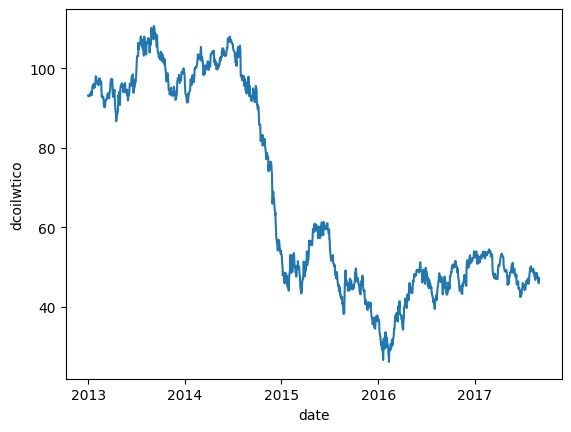

In [73]:
# From oil: recent trends, moving averages, volatility measures.

oil['date'] = pd.to_datetime(oil['date'])
oil['dcoilwtico'] = oil['dcoilwtico'].replace('.', np.nan).astype(float)
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate()
oil['dcoilwtico'] = oil['dcoilwtico'].bfill()

sns.lineplot(x='date', y='dcoilwtico', data=oil);

In [74]:
oil['dcoilwtico_lag'] = oil['dcoilwtico'].shift(1)

oil['dcoilwtico_lag_7'] = oil['dcoilwtico'].shift(7)

oil['dcoilwtico_lag_30'] = oil['dcoilwtico'].shift(30)

In [75]:
train = train.join(oil.set_index('date')[['dcoilwtico', 'dcoilwtico_lag', 'dcoilwtico_lag_7', 'dcoilwtico_lag_30']], on='date')
test = test.join(oil.set_index('date')[['dcoilwtico', 'dcoilwtico_lag', 'dcoilwtico_lag_7', 'dcoilwtico_lag_30']], on='date')

## Preprocess stores

In [76]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [77]:
stores = pd.get_dummies(stores, columns=['city', 'state', 'type', 'cluster'], drop_first=True)
stores.head()

,store_nbr,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,city_Esmeraldas,city_Guaranda,city_Guayaquil,city_Ibarra,city_Latacunga,city_Libertad,city_Loja,city_Machala,city_Manta,city_Playas,city_Puyo,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,state_Bolivar,state_Chimborazo,state_Cotopaxi,state_El Oro,state_Esmeraldas,state_Guayas,state_Imbabura,state_Loja,state_Los Rios,state_Manabi,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_B,type_C,type_D,type_E,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [78]:
train = train.join(stores.set_index('store_nbr'), on='store_nbr')
test = test.join(stores.set_index('store_nbr'), on='store_nbr')

## Preprocess Transactions

In [79]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [80]:
transactions['date'] = pd.to_datetime(transactions['date'])

In [81]:
train = train.join(transactions.groupby('date').sum().rename(columns={'transactions': 'transactions'}).loc[:,['transactions']], on='date')
test = test.join(transactions.groupby('date').sum().rename(columns={'transactions': 'transactions'}).loc[:,['transactions']], on='date')

## Fourier transformation

In [82]:
def fourier_series(t, n):
    return np.column_stack([np.cos(2 * np.pi * i * t) for i in range(1, n + 1)] + [np.sin(2 * np.pi * i * t) for i in range(1, n + 1)])

def fourier_features(_df, date_column, n):
    features = fourier_series(_df[date_column].dt.dayofyear / 365.25, n)
    return pd.concat([_df, pd.DataFrame(features, index=_df.index, columns=[f'{date_column}_fourier_{i}' for i in range(1, 2 * n + 1)])], axis=1)

train = fourier_features(train, 'date', 3)
test = fourier_features(test, 'date', 3)

In [83]:
skimpy.skim(train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 3008016 │ │ bool        │ 160   │                                                         │
│ │ Number of columns │ 176     │ │ float64     │ 12    │                                                         │
│ └───────────────────┴─────────┘ │ int64       │ 3     │                                                         │
│                                 │ datetime64  │ 1     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_nam ┃        ┃       ┃           ┃        ┃       ┃         ┃          ┃         ┃         ┃        ┃  │
│ ┃ e          ┃ NA     ┃ NA %  ┃ mean      ┃ sd     ┃ p0    ┃ p25     ┃ p50      ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ id         │      0 │     0 │   1502000 │ 865700 │     0 │  752000 │  1502000 │ 2249000 │ 3001000 │ ▇▇▇▇▇▇ │  │
│ │ store_nbr  │      0 │     0 │      27.5 │  15.59 │     1 │      14 │     27.5 │      41 │      54 │ ▇▇▇▇▇▇ │  │
│ │ sales      │      0 │     0 │     358.3 │   1104 │     0 │       0 │       11 │     196 │  124700 │   ▇    │  │
│ │ onpromotio │      0 │     0 │      2.61 │  12.26 │     0 │       0 │        0 │       0 │     741 │   ▇    │  │
│ │ n          │        │       │           │        │       │         │          │         │         │        │  │
│ │ dcoilwtico │ 862488 │ 28.67 │     67.89 │  25.66 │ 26.19 │   46.41 │    53.31 │   95.78 │   110.6 │ ▁▇▁ ▃▅ │  │
│ │ dcoilwtico │ 864270 │ 28.73 │      67.9 │  25.66 │ 26.19 │    46.4 │    53.33 │    95.8 │   110.6 │ ▁▇▁ ▃▅ │  │
│ │ _lag       │        │       │           │        │       │         │          │         │         │        │  │
│ │ dcoilwtico │ 874962 │ 29.09 │        68 │  25.69 │ 26.19 │   46.38 │    53.41 │   95.81 │   110.6 │ ▁▇▁ ▃▅ │  │
│ │ _lag_7     │        │       │           │        │       │         │          │         │         │        │  │
│ │ dcoilwtico │ 915948 │ 30.45 │     68.41 │  25.78 │ 26.19 │    46.6 │    53.83 │   95.95 │   110.6 │ ▂▇▁ ▃▅ │  │
│ │ _lag_30    │        │       │           │        │       │         │          │         │         │        │  │
│ │ transactio │   3564 │  0.12 │     84170 │  12310 │   770 │   76270 │    81640 │   90870 │  171200 │    ▇▅  │  │
│ │ ns         │        │       │           │        │       │         │          │         │         │        │  │
│ │ date_fouri │      0 │     0 │  -0.02709 │ 0.7117 │    -1 │ -0.7459 │ -0.04836 │  0.6875 │       1 │ ▇▃▃▃▃▇ │  │
│ │ er_1       │        │       │           │        │       │         │          │         │         │        │  │
│ │ date_fouri │      0 │     0 │   0.01455 │  0.706 │    -1 │ -0.6952 │  0.03547 │   0.718 │       1 │ ▇▃▃▃▃▇ │  │
│ │ er_2       │        │       │           │        │       │         │          │         │         │        │  │
│ │ date_fouri │      0 │     0 │ -0.008715 │ 0.7049 │    -1 │ -0.7105 │ -0.01613 │  0.6968 │  0.9999 │ ▇▃▃▃▃▇ │  │
│ │ er_3       │        │       │           │        │  

## Correlation matrix

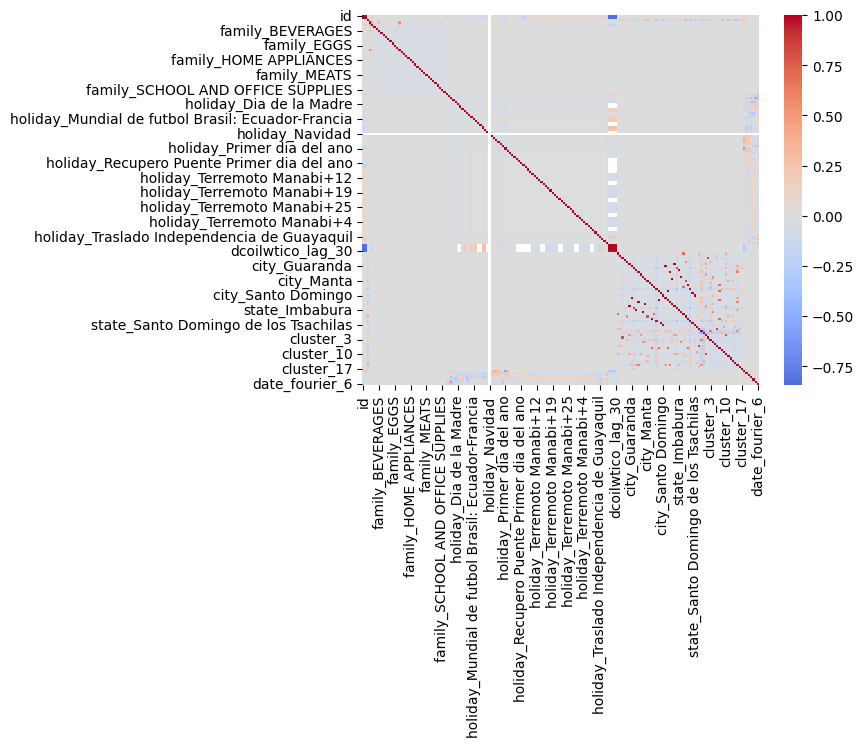

In [84]:
correlation_matrix = train.corr()

correlation_matrix['sales'].sort_values(ascending=False)

sns.heatmap(correlation_matrix, cmap='coolwarm', center=0);

In [85]:
correlation_matrix

,id,date,store_nbr,sales,onpromotion,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,holiday_Batalla de Pichincha,holiday_Black Friday,holiday_Carnaval,holiday_Cyber Monday,holiday_Dia de Difuntos,holiday_Dia de la Madre,holiday_Dia de la Madre-1,holiday_Dia del Trabajo,holiday_Inauguracion Mundial de futbol Brasil,holiday_Independencia de Cuenca,holiday_Independencia de Guayaquil,holiday_Mundial de futbol Brasil: Cuartos de Final,holiday_Mundial de futbol Brasil: Ecuador-Francia,holiday_Mundial de futbol Brasil: Ecuador-Honduras,holiday_Mundial de futbol Brasil: Ecuador-Suiza,holiday_Mundial de futbol Brasil: Final,holiday_Mundial de futbol Brasil: Octavos de Final,holiday_Mundial de futbol Brasil: Semifinales,holiday_Mundial de futbol Brasil: Tercer y cuarto lugar,holiday_Navidad,holiday_Navidad+1,holiday_Navidad-1,holiday_Navidad-2,holiday_Navidad-3,holiday_Navidad-4,holiday_Primer Grito de Independencia,holiday_Primer dia del ano,holiday_Primer dia del ano-1,holiday_Puente Dia de Difuntos,holiday_Puente Navidad,holiday_Puente Primer dia del ano,holiday_Recupero Puente Dia de Difuntos,holiday_Recupero Puente Navidad,holiday_Recupero Puente Primer dia del ano,holiday_Recupero puente Navidad,holiday_Recupero puente primer dia del ano,holiday_Terremoto Manabi,holiday_Terremoto Manabi+1,holiday_Terremoto Manabi+10,holiday_Terremoto Manabi+11,holiday_Terremoto Manabi+12,holiday_Terremoto Manabi+13,holiday_Terremoto Manabi+14,holiday_Terremoto Manabi+15,holiday_Terremoto Manabi+16,holiday_Terremoto Manabi+17,holiday_Terremoto Manabi+18,holiday_Terremoto Manabi+19,holiday_Terremoto Manabi+2,holiday_Terremoto Manabi+20,holiday_Terremoto Manabi+21,holiday_Terremoto Manabi+22,holiday_Terremoto Manabi+23,holiday_Terremoto Manabi+24,holiday_Terremoto Manabi+25,holiday_Terremoto Manabi+26,holiday_Terremoto Manabi+27,holiday_Terremoto Manabi+28,holiday_Terremoto Manabi+29,holiday_Terremoto Manabi+3,holiday_Terremoto Manabi+30,holiday_Terremoto Manabi+4,holiday_Terremoto Manabi+5,holiday_Terremoto Manabi+6,holiday_Terremoto Manabi+7,holiday_Terremoto Manabi+8,holiday_Terremoto Manabi+9,holiday_Traslado Batalla de Pichincha,holiday_Traslado Independencia de Guayaquil,holiday_Traslado Primer Grito de Independencia,holiday_Traslado Primer dia del ano,holiday_Viernes Santo,dcoilwtico,dcoilwtico_lag,dcoilwtico_lag_7,dcoilwtico_lag_30,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,city_Esmeraldas,city_Guaranda,city_Guayaquil,city_Ibarra,city_Latacunga,city_Libertad,city_Loja,city_Machala,city_Manta,city_Playas,city_Puyo,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,state_Bolivar,state_Chimborazo,state_Cotopaxi,state_El Oro,state_Esmeraldas,state_Guayas,state_Imbabura,state_Loja,state_Los Rios,state_Manabi,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_B,type_C,type_D,type_E,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,transactions,date_fourier_1,date_fourier_2,date_fourier_3,date_fourier_4,date_fourier_5,date_fourier_6
id,1.000000,9.999997e-01,3.015228e-04,0.085790,0.205562,-3.062906e-06,-2.858713e-06,-2.654519e-06,-2.450325e-06,-2.246131e-06,-2.041938e-06,-1.837744e-06,-1.633550e-06,-1.429356e-06,-1.225163e-06,-1.020969e-06,-8.167750e-07,-6.125813e-07,-4.083875e-07,-2.041938e-07

In [86]:
keep = correlation_matrix.query("sales > 0.05 | sales < -0.05").index

In [89]:
train = train.loc[:, keep]
test = test.loc[:, keep.drop('sales')]

## NaN Gestion

In [90]:
train.isna().sum().sort_values(ascending=False)

holiday_Primer dia del ano           2758536
dcoilwtico_lag_30                     915948
dcoilwtico_lag_7                      874962
dcoilwtico_lag                        864270
dcoilwtico                            862488
transactions                            3564
cluster_3                                  0
type_C                                     0
state_Pichincha                            0
city_Quito                                 0
date                                       0
cluster_5                                  0
cluster_8                                  0
cluster_11                                 0
cluster_14                                 0
family_SEAFOOD                             0
family_SCHOOL AND OFFICE SUPPLIES          0
family_PRODUCE                             0
family_PLAYERS AND ELECTRONICS             0
family_PET SUPPLIES                        0
id                                         0
family_LINGERIE                            0
family_CLE

In [91]:
pd.set_option('display.max_columns', None)
train.head()

,id,date,sales,onpromotion,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_CELEBRATION,family_CLEANING,family_DAIRY,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,family_MAGAZINES,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,holiday_Primer dia del ano,dcoilwtico,dcoilwtico_lag,dcoilwtico_lag_7,dcoilwtico_lag_30,city_Quito,state_Pichincha,type_C,cluster_3,cluster_5,cluster_8,cluster_11,cluster_14,transactions
0,0,2013-01-01,0.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,93.14,NaN,NaN,NaN,True,True,False,False,False,False,False,False,770.0
1,1,2013-01-01,0.0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,93.14,NaN,NaN,NaN,True,True,False,False,False,False,False,False,770.0
2,2,2013-01-01,0.0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,93.14,NaN,NaN,NaN,True,True,False,False,False,False,False,False,770.0
3,3,2013-01-01,0.0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,93.14,NaN,NaN,NaN,True,True,False,False,False,False,False,False,770.0
4,4,2013-01-01,0.0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,93.14,NaN,NaN,NaN,True,True,False,False,False,False,False,False,770.0


In [92]:
import warnings
warnings.filterwarnings('ignore')

def nan_imputer(_df):
    _df["holiday_Primer dia del ano"] = _df["holiday_Primer dia del ano"].fillna(False)
    _df["dcoilwtico_lag_30"].fillna(method='bfill', inplace=True)
    _df["dcoilwtico_lag_7"].fillna(method='bfill', inplace=True)
    _df["dcoilwtico_lag"].fillna(method='bfill', inplace=True)
    _df["dcoilwtico"].fillna(method='bfill', inplace=True)
    _df["transactions"].fillna(np.median(_df["transactions"]), inplace=True)

nan_imputer(train)
nan_imputer(test)

In [93]:
train.isna().sum().sum(), test.isna().sum().sum()

(3564, 28512)

In [94]:
test.shape

(28512, 39)

In [95]:
test.transactions.isna().sum()

28512

In [96]:
test.isna().sum().sort_values(ascending=False)

transactions                         28512
dcoilwtico_lag_30                        0
family_PRODUCE                           0
family_SCHOOL AND OFFICE SUPPLIES        0
family_SEAFOOD                           0
holiday_Primer dia del ano               0
dcoilwtico                               0
dcoilwtico_lag                           0
dcoilwtico_lag_7                         0
city_Quito                               0
family_PET SUPPLIES                      0
state_Pichincha                          0
type_C                                   0
cluster_3                                0
cluster_5                                0
cluster_8                                0
cluster_11                               0
cluster_14                               0
family_PLAYERS AND ELECTRONICS           0
id                                       0
date                                     0
family_DAIRY                             0
onpromotion                              0
family_BABY

In [97]:
train.drop('transactions', axis=1, inplace=True)
test.drop('transactions', axis=1, inplace=True)

# Predictions

In [98]:
train.to_feather('../Data/Processed/train.feather')
test.to_feather('../Data/Processed/test.feather')